Secret Word :

**DEV**

In [218]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Task 1

In [219]:
t=symbols('t')
#Trajectory Planning
def Trajec(y_0,yd_0,y_f,yd_f,t_0,t_f):
  Y_0 = np.array([[y_0],[yd_0],[y_f],[yd_f]])
  Y_B = np.array([[1,t_0,t_0**2,t_0**3],
                  [0,1,2*t_0,3*t_0**2],
                  [1,t_f,t_f**2,t_f**3],
                  [0,1,2*t_f,3*t_f**2]])
  Y_B_inv = np.linalg.inv(Y_B)
  Y_A = Y_B_inv@Y_0
  a_0 = Y_A[0,0]
  a_1 = Y_A[1,0]
  a_2 = Y_A[2,0]
  a_3 = Y_A[3,0]
  y = a_0+(a_1*t)+(a_2*(t**2))+(a_3*(t**3))
  yd = a_1+(2*a_2*t)+(3*a_3*(t**2))
  ydd = 2*a_2+(6*a_3*t)
  return [y,yd,ydd]

t_0 = 0
t_f = 10
div=100
T = np.linspace(t_0,t_f,div)

[y,yd,ydd] = Trajec(0.06,0,0.01,0,t_0,t_f)

Y=np.copy(T)
Yd=np.copy(T)
Ydd=np.copy(T)

for i in range(len(T)):
  Y[i] = y.subs(t,T[i])
  Yd[i] = yd.subs(t,T[i])
  Ydd[i] = ydd.subs(t,T[i])

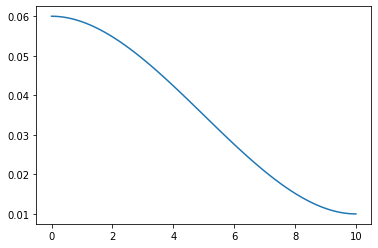

In [220]:
plt.plot(T,Y)

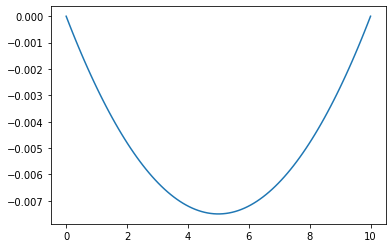

In [221]:
plt.plot(T,Yd)

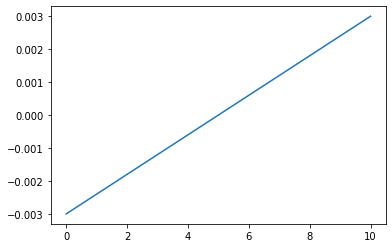

In [222]:
plt.plot(T,Ydd)

**NOTE** : 

**I choose SCARA robot for further tasks.**

Task 2


In [223]:
# Co-ordinates of Given Rectangle
A = np.array([0.4,0.06,0.1])
B = np.array([0.4,0.01,0.1])

In [224]:
def invkin_SCARA (x,y,z,l_0,l_1,l_2):
  r = (x**2+y**2-l_1**2-l_2**2)/(2*l_1*l_2)
  if r>1 or r<-1:
    print("Outside Workspace")
  theta2 = np.arctan2(np.sqrt(1-r**2),r)
  theta1 = np.arctan2(y,x) - np.arctan2((l_2*np.sin(theta2)),(l_1+l_2*np.cos(theta2)))
  theta2 = theta2*180/np.pi
  theta1 = theta1*180/np.pi
  d3 = l_0-z
  return theta1,theta2,d3

#Joint 1 - Trajectory Planning
def Trajec_J1(t_0,t_f):
  [theta1_i,theta2_i,d3_i] = invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
  [theta1_f,theta2_f,d3_f] = invkin_SCARA(B[0],B[1],B[2],0.25,0.25,0.25)
  Y_0 = np.array([[theta1_i],[0],[theta1_f],[0]])
  Y_B = np.array([[1,t_0,t_0**2,t_0**3],
                  [0,1,2*t_0,3*t_0**2],
                  [1,t_f,t_f**2,t_f**3],
                  [0,1,2*t_f,3*t_f**2]])
  Y_B_inv = np.linalg.inv(Y_B)
  Y_A = Y_B_inv@Y_0
  a_0 = Y_A[0,0]
  a_1 = Y_A[1,0]
  a_2 = Y_A[2,0]
  a_3 = Y_A[3,0]
  q1 = a_0+(a_1*t)+(a_2*(t**2))+(a_3*(t**3))
  q1d = a_1+(2*a_2*t)+(3*a_3*(t**2))
  q1dd = 2*a_2+(6*a_3*t)
  return [q1,q1d,q1dd]

#Joint 2 - Trajectory Planning
def Trajec_J2(t_0,t_f):
  [theta1_i,theta2_i,d3_i] = invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
  [theta1_f,theta2_f,d3_f] = invkin_SCARA(B[0],B[1],B[2],0.25,0.25,0.25)
  Y_0 = np.array([[theta2_i],[0],[theta2_f],[0]])
  Y_B = np.array([[1,t_0,t_0**2,t_0**3],
                  [0,1,2*t_0,3*t_0**2],
                  [1,t_f,t_f**2,t_f**3],
                  [0,1,2*t_f,3*t_f**2]])
  Y_B_inv = np.linalg.inv(Y_B)
  Y_A = Y_B_inv@Y_0
  a_0 = Y_A[0,0]
  a_1 = Y_A[1,0]
  a_2 = Y_A[2,0]
  a_3 = Y_A[3,0]
  q2 = a_0+(a_1*t)+(a_2*(t**2))+(a_3*(t**3))
  q2d = a_1+(2*a_2*t)+(3*a_3*(t**2))
  q2dd = 2*a_2+(6*a_3*t)
  return [q2,q2d,q2dd]

#Joint 3 - Trajectory Planning
def Trajec_J3(t_0,t_f):
  [theta1_i,theta2_i,d3_i] = invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
  [theta1_f,theta2_f,d3_f] = invkin_SCARA(B[0],B[1],B[2],0.25,0.25,0.25)
  Y_0 = np.array([[d3_i],[0],[d3_f],[0]])
  Y_B = np.array([[1,t_0,t_0**2,t_0**3],
                  [0,1,2*t_0,3*t_0**2],
                  [1,t_f,t_f**2,t_f**3],
                  [0,1,2*t_f,3*t_f**2]])
  Y_B_inv = np.linalg.inv(Y_B)
  Y_A = Y_B_inv@Y_0
  a_0 = Y_A[0,0]
  a_1 = Y_A[1,0]
  a_2 = Y_A[2,0]
  a_3 = Y_A[3,0]
  q3 = a_0+(a_1*t)+(a_2*(t**2))+(a_3*(t**3))
  q3d = a_1+(2*a_2*t)+(3*a_3*(t**2))
  q3dd = 2*a_2+(6*a_3*t)
  return [q3,q3d,q3dd]

[q1,q1d,q1dd] = Trajec_J1(t_0,t_f)
[q2,q2d,q2dd] = Trajec_J2(t_0,t_f)
[q3,q3d,q3dd] = Trajec_J3(t_0,t_f)

Q1 = np.copy(T)
Q2 = np.copy(T)
Q3 = np.copy(T)

for i in range(len(T)):
  Q1[i] = q1.subs(t,T[i])
  Q2[i] = q2.subs(t,T[i])
  Q3[i] = q3.subs(t,T[i])
                  

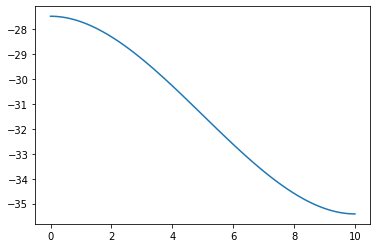

In [225]:
plt.plot(T,Q1)

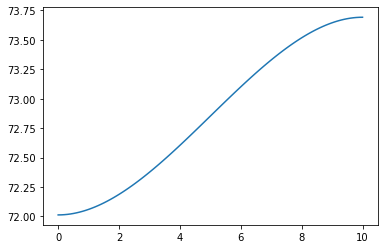

In [226]:
plt.plot(T,Q2)

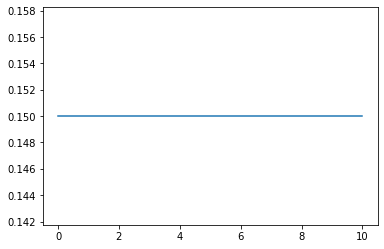

In [227]:
plt.plot(T,Q3)

In [228]:
#will have to use these for solving further questions
print(q1)
print(q1d)
print(q2)
print(q2d)
print(q3)
print(q3d)

0.0158763096506925*t**3 - 0.238144644760388*t**2 - 8.81312226013872e-17*t - 27.4757704901373
0.0476289289520776*t**2 - 0.476289289520776*t - 8.81312226013872e-17
-0.00335794159825115*t**3 + 0.0503691239737671*t**2 + 1.86403203886252e-17*t + 72.0130722001709
-0.0100738247947534*t**2 + 0.100738247947534*t + 1.86403203886252e-17
0.150000000000000
0


In [229]:
#will have to use these for solving further questions
Q1d = np.copy(T)
Q2d = np.copy(T)
Q3d = np.copy(T)

for i in range(len(T)):
  Q1d[i] = q1d.subs(t,T[i])
  Q2d[i] = q2d.subs(t,T[i])
  Q3d[i] = q3d.subs(t,T[i])

Task 3

In [230]:
#Given
l_0 = 0.25 # in m
l_1 = 0.25 # in m
l_2 = 0.25 # in m

#Assuming
m_1 = 1 # in kg
m_2 = 1 # in kg
m_3 = 1 # in kg

#Taking
g = 9.81 # in m/s^2

#For storing
stack1 = []
stack2 = []
stack3 = []

a) PD control with small steady state error and dmaping ratio close to 1.

In [231]:
def time_der(y,T,l_0,l_1,l_2,m_1,m_2,m_3,Kp,Kd):
  global stack1, stack2, stack3
  # States of the system 
  q1, q1d, q2, q2d, q3, q3d = y
  t = T

  q1des= 0.0158763096506925*(t**3) - 0.238144644760388*(t**2) - 8.81312226013872e-17*t - 27.4757704901373
  q1ddes= 0.0476289289520776*(t**2) - 0.476289289520776*t - 8.81312226013872e-17
  q2des= -0.00335794159825115*(t**3) + 0.0503691239737671*(t**2) + 1.86403203886252e-17*t + 72.0130722001709
  q2ddes= -0.0100738247947534*(t**2) + 0.100738247947534*t + 1.86403203886252e-17
  q3des= 0.150000000000000
  q3ddes= 0
  
  # Computing error
  u1= Kp*(q1des-q1)+Kd*(q1ddes-q1d)
  u2= Kp*(q2des-q2)+Kd*(q2ddes-q2d)
  u3= Kp*(q3des-q3)+Kd*(q3ddes-q3d)
  tau= np.array([[u1],[u2],[u3]])

  # For Arm1
  r_1 = l_1/2
  J_1 = (1/3)*m_1*l_1*l_1

  # For Arm2
  r_2=l_2/2
  J_2 = (1/3)*m_2*l_2*l_2

  alpha = J_1+ r_1*r_1*m_1 +l_1*l_1*m_2+l_1*l_1*m_3
  beta = J_2 +l_2*l_2*m_3+m_2*r_2*r_2
  gamma = l_1*l_2*m_3+l_1*r_2*m_2

  D = np.array([[alpha + beta + 2*gamma*np.cos(q2), beta + 2*gamma*np.cos(q2), 0],
               [beta + 2*gamma*np.cos(q2), beta, 0],
               [0, 0, m_3]])

  # Evaluating C*Qdot matrix
  C = np.array([[-gamma*np.sin(q2)*q2d, -gamma*np.sin(q2)*(q2d + q1d), 0],
                  [gamma*np.sin(q2)*q1d, 0, 0],
                  [0, 0, 0]])
  Qdot= np.array([[q1d],[q2d],[q3d]])
  CQdot = np.matmul(C,Qdot)

  G = (np.array([[0], [0], [m_3*g]]))

  qd = np.matmul(np.linalg.inv(D),(tau-CQdot-G)) 
  q1dd = qd[0]
  q2dd = qd[1]
  q3dd = qd[2]
  stack1 = np.hstack((stack1,q1))
  stack2 = np.hstack((stack2,q2))
  stack3 = np.hstack((stack3,q3))
  return q1d, q1dd, q2d, q2dd, q3d, q3dd

# Defining Initial condition
[q1_0,q2_0,q3_0]= invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
ini_cond = np.array([q1_0,0,q2_0,0,q3_0,0]) 

#Solving dynamic equation
output1 = odeint(time_der, ini_cond, T, args=(l_0,l_1,l_2,m_1,m_2,m_3,2,5000))


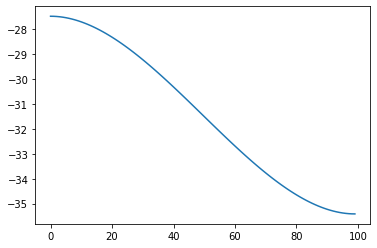

In [232]:
plt.plot(output1[:,0])

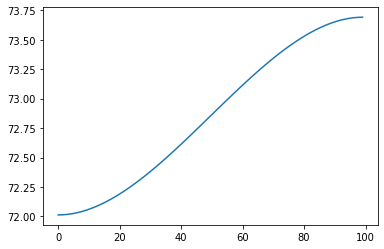

In [233]:
plt.plot(output1[:,2])

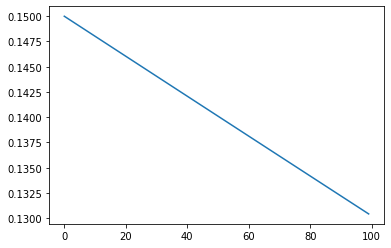

In [234]:
plt.plot(output1[:,4])

b) Same PD control along with a feedforward control.

In [235]:
def FF_control(y,T,l_0,l_1,l_2,m_1,m_2,m_3,Kp,Kd):
  # Actuator Parameters
  Jm1 = 0.4e-4 
  Jm2 = 0.4e-4
  Jm3 = 0.4e-4
  Bm1 = 4.77e-05
  Bm2 = 4.77e-05
  Bm3 = 4.77e-05
  Kb1 = 0.0232
  Kb2 = 0.0232
  Kb3 = 0.0232
  Km1 = 2.32e-02
  Km2 = 2.32e-02
  Km3 = 2.32e-02
  R1 = 0.365
  R2 = 0.365
  R3 = 0.365
  r1 = 1/100
  r2 = 1/100
  r3 = 1/100

  global stack1, stack2, stack3
  # States of the system 
  q1, q1d, q2, q2d, q3, q3d = y
  t = T

  q1des= 0.0158763096506925*(t**3) - 0.238144644760388*(t**2) - 8.81312226013872e-17*t - 27.4757704901373
  q1ddes= 0.0476289289520776*(t**2) - 0.476289289520776*t - 8.81312226013872e-17
  q2des= -0.00335794159825115*(t**3) + 0.0503691239737671*(t**2) + 1.86403203886252e-17*t + 72.0130722001709
  q2ddes= -0.0100738247947534*(t**2) + 0.100738247947534*t + 1.86403203886252e-17
  q3des= 0.150000000000000
  q3ddes= 0

   # For Arm1
  r_1 = l_1/2
  J_1 = (1/3)*m_1*l_1*l_1

  # For Arm2
  r_2=l_2/2
  J_2 = (1/3)*m_2*l_2*l_2

  alpha = J_1+ r_1*r_1*m_1 +l_1*l_1*m_2+l_1*l_1*m_3
  beta = J_2 +l_2*l_2*m_3+m_2*r_2*r_2
  gamma = l_1*l_2*m_3+l_1*r_2*m_2

  D = np.array([[alpha + beta + 2*gamma*np.cos(q2), beta + 2*gamma*np.cos(q2), 0],
               [beta + 2*gamma*np.cos(q2), beta, 0],
               [0, 0, m_3]])

   # Evaluating C*Qdot matrix
  C = np.array([[-gamma*np.sin(q2)*q2d, -gamma*np.sin(q2)*(q2d + q1d), 0],
                  [gamma*np.sin(q2)*q1d, 0, 0],
                  [0, 0, 0]])
  Qdot= np.array([[q1d],[q2d],[q3d]])
  CQdot = np.matmul(C,Qdot)

  G = (np.array([[0], [0], [m_3*g]]))

  # Array for desired q
  Qdes = np.array([[q1des],[q2des],[q3des]])
  Qddes = np.array([[q1ddes],[q2ddes],[q3ddes]])

  # Array for real q
  Q = np.array([[q1],[q2],[q3]])
  Qd = np.array([[q1d],[q2d],[q3d]])

  #Actuator Dynamics
  Jeff = np.array([[Jm1/r1**2,0,0],[0,Jm2/r2**2,0],[0,0,Jm3/r3**2]])
  Beff = np.array([[(Bm1+Kb1*Km1/R1)/r1**2,0,0],[0,(Bm2+Kb2*Km2/R2)/r2**2,0],[0,0,(Bm3+Kb3*Km3/R3)/r3**2]])
  Bqd = np.matmul(Beff,Qd)
  #Control
  K = np.array([[Km1/(r1*R1),0,0],[0,Km2/(r2*R2),0],[0,0,Km3/(r3*R3)]])

  u1= Kp*(q1des-q1)+Kd*(q1ddes-q1d)+((Jm1/r1**2)/(Km1/(r1*R1)))*q1ddes+((Bm1+Kb1*Km1/R1)/r1**2)*q1des
  u2= Kp*(q2des-q2)+Kd*(q2ddes-q2d)+((Jm2/r2**2)/(Km2/(r2*R2)))*q2ddes+((Bm2+Kb2*Km2/R2)/r2**2)*q2des
  u3= Kp*(q3des-q3)+Kd*(q3ddes-q3d)+((Jm3/r3**2)/(Km3/(r3*R3)))*q3ddes+((Bm3+Kb3*Km3/R3)/r3**2)*q3des
  tau= np.array([[u1],[u2],[u3]])

  qd = np.matmul(np.linalg.inv(D),(tau-CQdot-G)) 
  q1dd = qd[0]
  q2dd = qd[1]
  q3dd = qd[2]
  return q1d, q1dd, q2d, q2dd, q3d, q3dd

#Initial condition
[q1_0,q2_0,q3_0]= invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
ini_cond = np.array([q1_0,0,q2_0,0,q3_0,0]) 

#Solving dynamic equation
output2 = odeint(FF_control, ini_cond, T, args=(l_0,l_1,l_2,m_1,m_2,m_3,1000,12000))


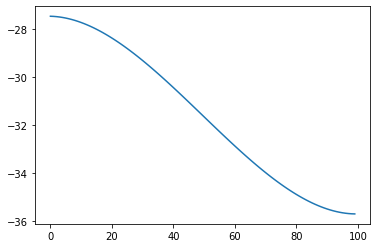

In [236]:
plt.plot(output2[:,0])

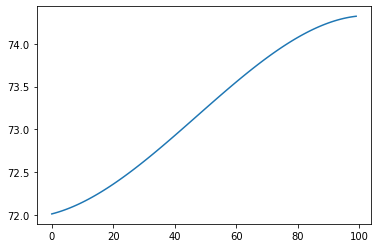

In [237]:
plt.plot(output2[:,2])

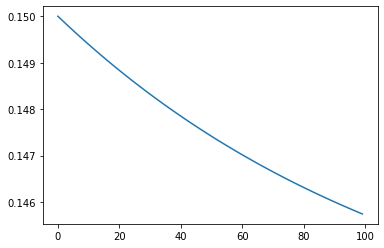

In [238]:
plt.plot(output2[:,4])

c) Same PD control along with a feedforward disturbance cancellation using computed torque method.

In [239]:
def Comp_torque(y,T,l_0,l_1,l_2,m_1,m_2,m_3,Kp,Kd):
  # Actuator Parameters
  Jm1 = 0.4e-4 
  Jm2 = 0.4e-4
  Jm3 = 0.4e-4
  Bm1 = 4.77e-05
  Bm2 = 4.77e-05
  Bm3 = 4.77e-05
  Kb1 = 0.0232
  Kb2 = 0.0232
  Kb3 = 0.0232
  Km1 = 2.32e-02
  Km2 = 2.32e-02
  Km3 = 2.32e-02
  R1 = 0.365
  R2 = 0.365
  R3 = 0.365
  r1 = 1/100
  r2 = 1/100
  r3 = 1/100

  global stack1, stack2, stack3
  # States of the system 
  q1, q1d, q2, q2d, q3, q3d = y
  t = T

  q1des= 0.0158763096506925*(t**3) - 0.238144644760388*(t**2) - 8.81312226013872e-17*t - 27.4757704901373
  q1ddes= 0.0476289289520776*(t**2) - 0.476289289520776*t - 8.81312226013872e-17
  q2des= -0.00335794159825115*(t**3) + 0.0503691239737671*(t**2) + 1.86403203886252e-17*t + 72.0130722001709
  q2ddes= -0.0100738247947534*(t**2) + 0.100738247947534*t + 1.86403203886252e-17
  q3des= 0.150000000000000
  q3ddes= 0

   # For Arm1
  r_1 = l_1/2
  J_1 = (1/3)*m_1*l_1*l_1

  # For Arm2
  r_2=l_2/2
  J_2 = (1/3)*m_2*l_2*l_2

  alpha = J_1+ r_1*r_1*m_1 +l_1*l_1*m_2+l_1*l_1*m_3
  beta = J_2 +l_2*l_2*m_3+m_2*r_2*r_2
  gamma = l_1*l_2*m_3+l_1*r_2*m_2

  D = np.array([[alpha + beta + 2*gamma*np.cos(q2), beta + 2*gamma*np.cos(q2), 0],
               [beta + 2*gamma*np.cos(q2), beta, 0],
               [0, 0, m_3]])

   # Evaluating C*Qdot matrix
  C = np.array([[-gamma*np.sin(q2)*q2d, -gamma*np.sin(q2)*(q2d + q1d), 0],
                  [gamma*np.sin(q2)*q1d, 0, 0],
                  [0, 0, 0]])
  Qdot= np.array([[q1d],[q2d],[q3d]])
  CQdot = np.matmul(C,Qdot)

  G = (np.array([[0], [0], [m_3*g]]))

  # Array for desired q
  Qdes = np.array([[q1des],[q2des],[q3des]])
  Qddes = np.array([[q1ddes],[q2ddes],[q3ddes]])

  # Array for real q
  Q = np.array([[q1],[q2],[q3]])
  Qd = np.array([[q1d],[q2d],[q3d]])

  #Actuator Dynamics
  J = np.array([[Jm1/r1**2,0,0],[0,Jm2/r2**2,0],[0,0,Jm3/r3**2]])
  B = np.array([[(Bm1+Kb1*Km1/R1)/r1**2,0,0],[0,(Bm2+Kb2*Km2/R2)/r2**2,0],[0,0,(Bm3+Kb3*Km3/R3)/r3**2]])
  Bqd = np.matmul(B,Qd)
  #Control
  M = D+J 
  h = CQdot+Bqd 
  v = Qddes+Kp*(Qdes-Q)+Kd*(Qddes-Qd)
  tau = np.matmul(M,v) + h

  qd = np.matmul(np.linalg.inv(D+J),(tau-Bqd-CQdot-G)) 
  q1dd = qd[0]
  q2dd = qd[1]
  q3dd = qd[2]
  return q1d, q1dd, q2d, q2dd, q3d, q3dd

#Initial condition
[q1_0,q2_0,q3_0]= invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
ini_cond = np.array([q1_0,0,q2_0,0,q3_0,0]) 

#Solving dynamic equation
output3 = odeint(Comp_torque, ini_cond, T, args=(l_0,l_1,l_2,m_1,m_2,m_3,1200,20000))


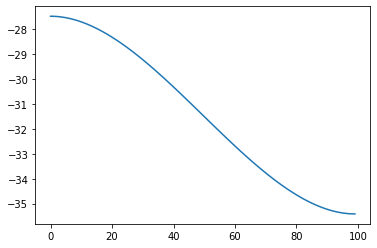

In [240]:
plt.plot(output3[:,0])

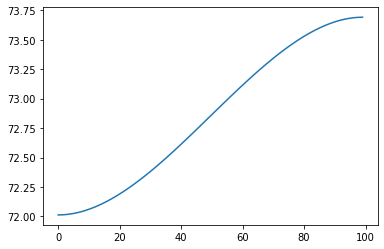

In [241]:
plt.plot(output3[:,2])

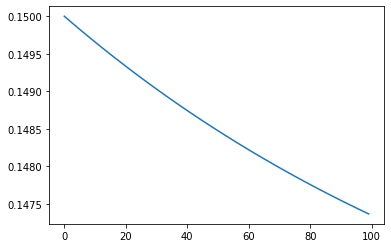

In [242]:
plt.plot(output3[:,4])

d) Multivariable Control

In [243]:
def Multi_control(y,T,l_0,l_1,l_2,m_1,m_2,m_3,Kp,Kd):
  # Actuator Parameters
  Jm1 = 0.4e-4 
  Jm2 = 0.4e-4
  Jm3 = 0.4e-4
  Bm1 = 4.77e-05
  Bm2 = 4.77e-05
  Bm3 = 4.77e-05
  Kb1 = 0.0232
  Kb2 = 0.0232
  Kb3 = 0.0232
  Km1 = 2.32e-02
  Km2 = 2.32e-02
  Km3 = 2.32e-02
  R1 = 0.365
  R2 = 0.365
  R3 = 0.365
  r1 = 1/100
  r2 = 1/100
  r3 = 1/100

  global stack1, stack2, stack3
  # States of the system 
  q1, q1d, q2, q2d, q3, q3d = y
  t = T

  q1des= 0.0158763096506925*(t**3) - 0.238144644760388*(t**2) - 8.81312226013872e-17*t - 27.4757704901373
  q1ddes= 0.0476289289520776*(t**2) - 0.476289289520776*t - 8.81312226013872e-17
  q2des= -0.00335794159825115*(t**3) + 0.0503691239737671*(t**2) + 1.86403203886252e-17*t + 72.0130722001709
  q2ddes= -0.0100738247947534*(t**2) + 0.100738247947534*t + 1.86403203886252e-17
  q3des= 0.150000000000000
  q3ddes= 0
  
  # Computing error
  u1= Kp*(q1des-q1)+Kd*(q1ddes-q1d)
  u2= Kp*(q2des-q2)+Kd*(q2ddes-q2d)
  u3= Kp*(q3des-q3)+Kd*(q3ddes-q3d)
  tau= np.array([[u1],[u2],[u3]])

  # For Arm1
  r_1 = l_1/2
  J_1 = (1/3)*m_1*l_1*l_1

  # For Arm2
  r_2=l_2/2
  J_2 = (1/3)*m_2*l_2*l_2

  alpha = J_1+ r_1*r_1*m_1 +l_1*l_1*m_2+l_1*l_1*m_3
  beta = J_2 +l_2*l_2*m_3+m_2*r_2*r_2
  gamma = l_1*l_2*m_3+l_1*r_2*m_2

  D = np.array([[alpha + beta + 2*gamma*np.cos(q2), beta + 2*gamma*np.cos(q2), 0],
               [beta + 2*gamma*np.cos(q2), beta, 0],
               [0, 0, m_3]])

   # Evaluating C*Qdot matrix
  C = np.array([[-gamma*np.sin(q2)*q2d, -gamma*np.sin(q2)*(q2d + q1d), 0],
                  [gamma*np.sin(q2)*q1d, 0, 0],
                  [0, 0, 0]])
  Qdot= np.array([[q1d],[q2d],[q3d]])
  CQdot = np.matmul(C,Qdot)

  G = (np.array([[0], [0], [m_3*g]]))

  # Array for desired q
  Qdes = np.array([[q1des],[q2des],[q3des]])
  Qddes = np.array([[q1ddes],[q2ddes],[q3ddes]])

  # Array for real q
  Q = np.array([[q1],[q2],[q3]])
  Qd = np.array([[q1d],[q2d],[q3d]])

  #Actuator Dynamics
  J = np.array([[Jm1/r1**2,0,0],[0,Jm2/r2**2,0],[0,0,Jm3/r3**2]])
  B = np.array([[(Bm1+Kb1*Km1/R1)/r1**2,0,0],[0,(Bm2+Kb2*Km2/R2)/r2**2,0],[0,0,(Bm3+Kb3*Km3/R3)/r3**2]])
  Bqd = np.matmul(B,Qd)
  #Control
  K = np.array([[Km1/(r1*R1),0,0],[0,Km2/(r2*R2),0],[0,0,Km3/(r3*R3)]])
  Vk = Kp*(Qdes-Q)+Kd*(Qddes-Qd)
  tau = np.matmul(K,Vk)

  qd = np.matmul(np.linalg.inv(D+J),(tau-Bqd-CQdot-G)) 
  q1dd = qd[0]
  q2dd = qd[1]
  q3dd = qd[2]
  return q1d, q1dd, q2d, q2dd, q3d, q3dd

#Initial condition
[q1_0,q2_0,q3_0]= invkin_SCARA(A[0],A[1],A[2],0.25,0.25,0.25)
ini_cond = np.array([q1_0,0,q2_0,0,q3_0,0]) 

#Solving dynamic equation
output4 = odeint(Multi_control, ini_cond, T, args=(l_0,l_1,l_2,m_1,m_2,m_3,1500,50000))


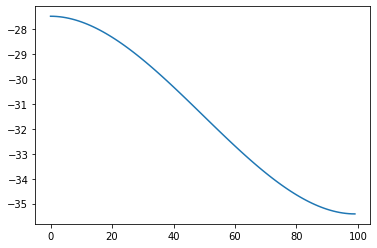

In [244]:
plt.plot(output4[:,0])

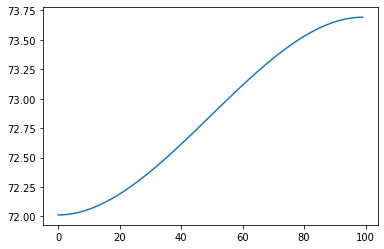

In [245]:
plt.plot(output4[:,2])

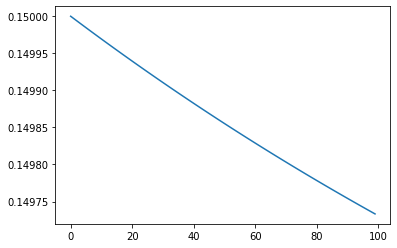

In [246]:
plt.plot(output4[:,4])

In [247]:
def fwdkin_SCARA(theta1,theta2,d3,l_0,l_1,l_2):
  theta1 = theta1*np.pi/180
  theta2 = theta2*np.pi/180
  x = l_1*np.cos(theta1)+ l_2*np.cos(theta1+theta2)
  y = l_2*np.sin(theta1)+ l_2*np.sin(theta1+theta2)
  z = l_0-d3
  return x,y,z 

In [248]:
X1 = np.copy(T)
X2 = np.copy(T)
X3 = np.copy(T)
X4 = np.copy(T)
Y1 = np.copy(T)
Y2 = np.copy(T)
Y3 = np.copy(T)
Y4 = np.copy(T)
Z1 = np.copy(T)
Z2 = np.copy(T)
Z3 = np.copy(T)
Z4 = np.copy(T)
Xd = np.copy(T)
Yd = np.copy(T)
Zd = np.copy(T)
for i in range(len(T)):
  QQd = np.array([Q1[1],Q2[i],Q3[i]])
  QQ1 = np.array([output1[i,0],output1[i,2],output1[i,4]])
  QQ2 = np.array([output2[i,0],output2[i,2],output2[i,4]])
  QQ3 = np.array([output3[i,0],output3[i,2],output3[i,4]])
  QQ4 = np.array([output4[i,0],output4[i,2],output4[i,4]])
  [X1[i],Y1[i],Z1[i]]= fwdkin_SCARA(QQ1[0],QQ1[1],QQ1[2],0.25,0.25,0.25)  
  [X2[i],Y2[i],Z2[i]]= fwdkin_SCARA(QQ2[0],QQ2[1],QQ2[2],0.25,0.25,0.25)  
  [X3[i],Y3[i],Z3[i]]= fwdkin_SCARA(QQ3[0],QQ3[1],QQ3[2],0.25,0.25,0.25)  
  [X4[i],Y4[i],Z4[i]]= fwdkin_SCARA(QQ4[0],QQ4[1],QQ4[2],0.25,0.25,0.25)  
  [Xd[i],Yd[i],Zd[i]]= fwdkin_SCARA(QQd[0],QQd[1],QQd[2],0.25,0.25,0.25)

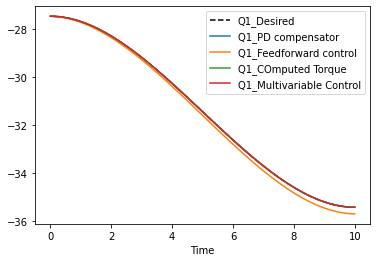

In [249]:
plt.plot(T,Q1, '--k')
plt.plot(T,output1[:,0])
plt.plot(T,output2[:,0])
plt.plot(T,output3[:,0])
plt.plot(T,output4[:,0])
plt.xlabel('Time')
plt.legend(["Q1_Desired","Q1_PD compensator","Q1_Feedforward control","Q1_COmputed Torque","Q1_Multivariable Control"])

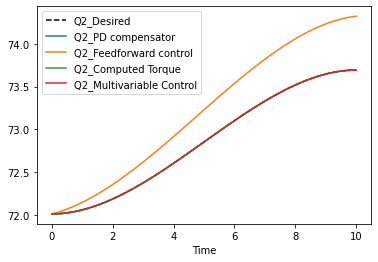

In [250]:
plt.plot(T,Q2, '--k')
plt.plot(T,output1[:,2])
plt.plot(T,output2[:,2])
plt.plot(T,output3[:,2])
plt.plot(T,output4[:,2])
plt.xlabel('Time')
plt.legend(["Q2_Desired","Q2_PD compensator","Q2_Feedforward control","Q2_Computed Torque","Q2_Multivariable Control"])

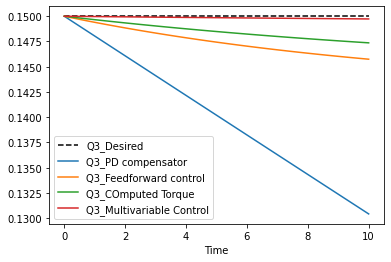

In [251]:
plt.plot(T,Q3, '--k')
plt.plot(T,output1[:,4])
plt.plot(T,output2[:,4])
plt.plot(T,output3[:,4])
plt.plot(T,output4[:,4])
plt.xlabel('Time')
plt.legend(["Q3_Desired","Q3_PD compensator","Q3_Feedforward control","Q3_COmputed Torque","Q3_Multivariable Control"])

Task 4

(a)

In [271]:
output1 = odeint(time_der, ini_cond, T, args=(l_0*0.8,l_1,l_2,m_1,m_2,m_3,2,5000))

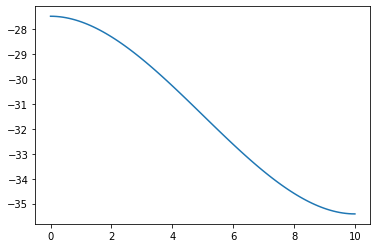

In [272]:
plt.plot(T,output1[:,0])

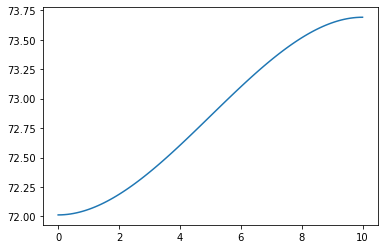

In [273]:
plt.plot(T,output1[:,2])

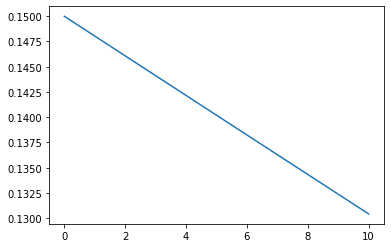

In [274]:
plt.plot(T,output1[:,4])

(b)

In [275]:
output2 = odeint(FF_control, ini_cond, T, args=(l_0*0.8,l_1,l_2,m_1,m_2,m_3,1000,12000))

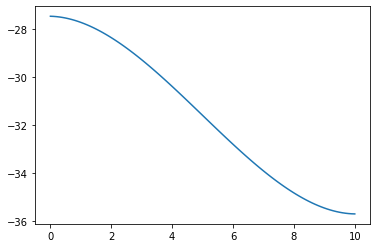

In [276]:
plt.plot(T,output2[:,0])

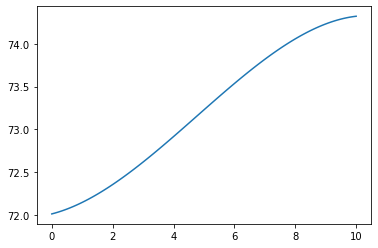

In [277]:
plt.plot(T,output2[:,2])

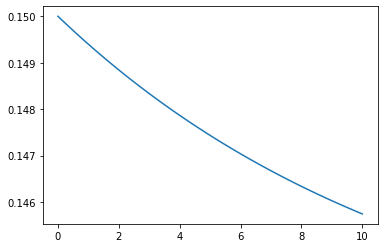

In [278]:
plt.plot(T,output2[:,4])

(c)

In [280]:
output3 = odeint(Comp_torque, ini_cond, T, args=(l_0*0.8,l_1,l_2,m_1,m_2,m_3,1200,20000))

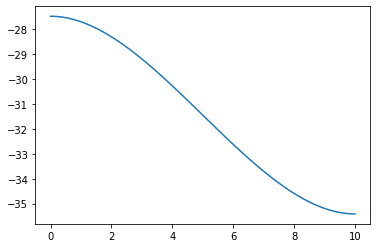

In [281]:
plt.plot(T,output3[:,0])

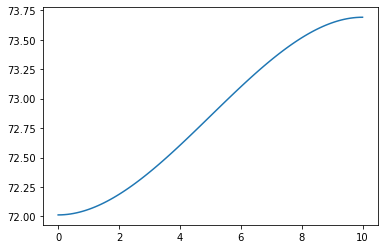

In [282]:
plt.plot(T,output3[:,2])

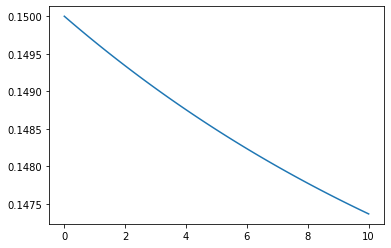

In [283]:
plt.plot(T,output3[:,4])

(d)

In [284]:
output4 = odeint(Multi_control, ini_cond, T, args=(l_0*0.8,l_1,l_2,m_1,m_2,m_3,1500,50000))

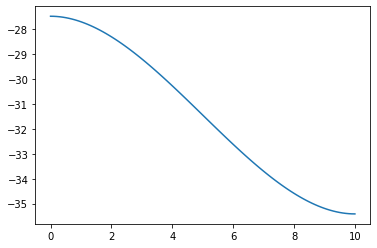

In [285]:
plt.plot(T,output4[:,0])

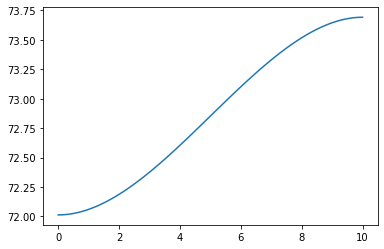

In [286]:
plt.plot(T,output4[:,2])

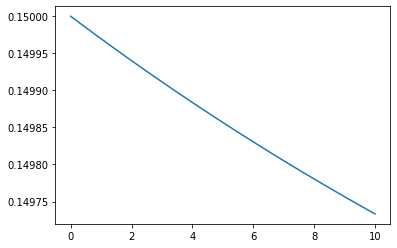

In [287]:
plt.plot(T,output4[:,4])

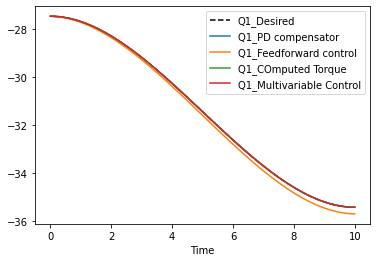

In [288]:
plt.plot(T,Q1, '--k')
plt.plot(T,output1[:,0])
plt.plot(T,output2[:,0])
plt.plot(T,output3[:,0])
plt.plot(T,output4[:,0])
plt.xlabel('Time')
plt.legend(["Q1_Desired","Q1_PD compensator","Q1_Feedforward control","Q1_COmputed Torque","Q1_Multivariable Control"])

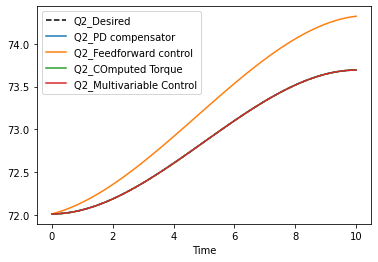

In [289]:
plt.plot(T,Q2, '--k')
plt.plot(T,output1[:,2])
plt.plot(T,output2[:,2])
plt.plot(T,output3[:,2])
plt.plot(T,output4[:,2])
plt.xlabel('Time')
plt.legend(["Q2_Desired","Q2_PD compensator","Q2_Feedforward control","Q2_COmputed Torque","Q2_Multivariable Control"])

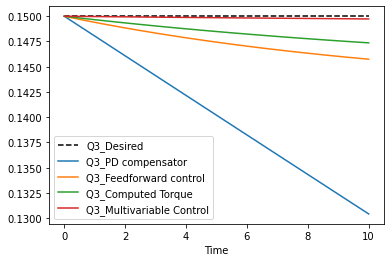

In [290]:
plt.plot(T,Q3, '--k')
plt.plot(T,output1[:,4])
plt.plot(T,output2[:,4])
plt.plot(T,output3[:,4])
plt.plot(T,output4[:,4])
plt.xlabel('Time')
plt.legend(["Q3_Desired","Q3_PD compensator","Q3_Feedforward control","Q3_Computed Torque","Q3_Multivariable Control"])